# Demonstration of Data Visualization, Clustering, and Classification

Let's break down how we'll approach each problem:

### Problem 1 (Small labeled subset):


- Load and preprocess the data
- Perform dimensionality reduction using PCA followed by t-SNE
- Apply k-means clustering
- Compare our clusters with the provided ground truth labels
- Visualize the results


### Problem 2 (Larger unsupervised analysis):


- Apply the same pipeline to the larger dataset
- Use logistic regression to identify informative features
- Discover genes that distinguish different cell types


### Problem 3 (Robustness analysis):


- Systematically vary parameters like:

- t-SNE perplexity
- Number of clusters in k-means
-

- PCA components


### Evaluate how these changes affect our results

In [20]:
# !pip install -q --upgrade nbconvert
# !pip install -q --upgrade pandoc

In [2]:
# Load Necessary Library 

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import os
import requests
from io import BytesIO
import PyPDF2
import pandas as pd
import re
from tqdm import tqdm
import tabula

In [10]:
# Global values (T-sne)

PERPLEXITY = 40

# Set seaborn style for better visualization
sns.set(style="whitegrid")


In [12]:
# The converted path from comma-seperated vale format (.csv) to pdf for the purposes of submitting my assignment on Flexisafe internship

# Adobe document URL
file_path = 'https://acrobat.adobe.com/id/urn:aaid:sc:EU:af37a4ee-736f-4eaa-9ecc-d0379ecf6e46?viewer%21megaVerb=group-discover'

In [14]:

def extract_data_from_adobe_pdf(url):
    """
    Extract data from a PDF hosted on Adobe Cloud and convert to a DataFrame.
    """
    print("Attempting to connect to Adobe document...")
    
    try:
        # For Adobe hosted documents, we need to authenticate and get the actual PDF binary
        # This is a simplified version - you may need an Adobe API key for production use
        session = requests.Session()
        # You'd typically add auth headers here based on Adobe's API requirements
        headers = {
            'User-Agent': 'Mozilla/5.0',
            'Accept': 'application/pdf'
        }
        
        # For demonstration - in reality, Adobe URLs need to be processed differently
        # as they're viewer URLs, not direct download links
        print("Note: Adobe Cloud links require authentication. Converting to direct download link...")
        
        # Extract the document ID from the URL
        match = re.search(r'urn:aaid:sc:EU:([\w-]+)', url)
        if not match:
            raise ValueError("Could not extract document ID from Adobe URL")
        
        doc_id = match.group(1)
        print(f"Document ID: {doc_id}")
        
        # In a real implementation, you would use Adobe's API to get a direct download link
        # This is a placeholder for that process
        print("Please provide Adobe API credentials in a production environment")
        
        # Use tabula-py to extract tables from the PDF
        # For demonstration, we'll assume we have the PDF file
        print("Using tabula to extract tables from PDF...")
        
        # In a real implementation, you would download the PDF first
        # tables = tabula.read_pdf("downloaded_file.pdf", pages='all')
        
        # Simulate extraction for demonstration
        print("Data extraction simulation (since we can't directly download from Adobe URL):")
        
        # Create a sample dataframe to demonstrate the structure
        sample_data = {
            'Column1': [1, 2, 3, 4, 5],
            'Column2': ['A', 'B', 'C', 'D', 'E'],
            'Column3': [10.1, 20.2, 30.3, 40.4, 50.5]
        }
        df = pd.DataFrame(sample_data)
        
        print("Successfully extracted data structure from PDF")
        return df
        
    except Exception as e:
        print(f"Error extracting data from PDF: {str(e)}")
        return None

def clean_and_process_data(df):
    """
    Clean and process the extracted data
    """
    if df is None:
        return None
    
    print("Cleaning and processing extracted data...")
    
    # Remove any empty rows
    df = df.dropna(how='all')
    
    # Reset index
    df = df.reset_index(drop=True)
    
    # Attempt to convert numeric columns
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  # Keep as is if not numeric
    
    print("Data cleaning complete")
    return df

def save_to_csv(df, output_path="reconstructed_data.csv"):
    """
    Save the processed dataframe to CSV
    """
    if df is None:
        return False
    
    try:
        df.to_csv(output_path, index=False)
        print(f"Data successfully saved to {output_path}")
        return True
    except Exception as e:
        print(f"Error saving CSV: {str(e)}")
        return False

In [16]:
# Extract data from PDF
extracted_df = extract_data_from_adobe_pdf(file_path)

# Clean and process the data
processed_df = clean_and_process_data(extracted_df)

# Display sample of the processed data
if processed_df is not None:
    print("\nSample of processed data:")
    print(processed_df.head())
    
    # Save to CSV
    save_to_csv(processed_df_flexisafe_version)
else:
    print("Could not process data from the PDF file.")

print("Process complete.")

Attempting to connect to Adobe document...
Error extracting data from PDF: name 'requests' is not defined
Could not process data from the PDF file.
Process complete.


In [9]:
## If dataset is local in computer
## Load Data
# file_path_X = "MMSDS/statistics_modeling/wk3/data_gene_diff/p1/X.npy"
# file_path_y = "MMSDS/statistics_modeling/wk3/data_gene_diff/p1/y.npy"

# X = np.load('p1/X.npy')  # Count matrix
# y = np.load('p1/y.npy')  # Ground truth labels

In [11]:
# Get dimensions
num_cells, num_genes = X.shape
print(f"Number of cells: {num_cells}, Number of genes: {num_genes}")

Number of cells: 511, Number of genes: 45768


In [14]:
# Extract the first column (genes)
first_column = X[:, 0]

# Find the maximum value and format to 5 decimal places
max_value = np.max(first_column)
print(f"Largest entry: {max_value:.5f}")

Largest entry: 11.94140


In [16]:
# DAta Transformation

# Apply Log transform
X_log = np.log2(X + 1)  # Apply log₂(x + 1) to every entry

# Extract the first column
first_column_processed = X_log[:, 0]  # All rows, first column

# Compute the maximum value of the column
max_value_processed = np.max(first_column_processed)

# Print formatted result of max_value_processed
print(f"Largest entry (processed): {max_value_processed:.5f}")

Largest entry (processed): 3.69392


In [18]:
# Analyses of Data raw and scaled using PCA

# PCA on raw data
pca_raw = PCA().fit(X)
raw_pc1 = pca_raw.explained_variance_ratio_[0]
cumulative_raw = np.cumsum(pca_raw.explained_variance_ratio_)
n_pcs_raw = np.argmax(cumulative_raw >= 0.85) + 1  # Add 1 for 1-based indexing

# PCA on log-transformed data
pca_log = PCA().fit(X_log)
log_pc1 = pca_log.explained_variance_ratio_[0]
cumulative_log = np.cumsum(pca_log.explained_variance_ratio_)
n_pcs_log = np.argmax(cumulative_log >= 0.85) + 1

print(f"Raw PC1 variance: {raw_pc1:.4f}")
print(f"Log PC1 variance: {log_pc1:.4f}")
print(f"Raw PCs for 85%: {n_pcs_raw}")
print(f"Log PCs for 85%: {n_pcs_log}")

Raw PC1 variance: 0.4278
Log PC1 variance: 0.1389
Raw PCs for 85%: 36
Log PCs for 85%: 339


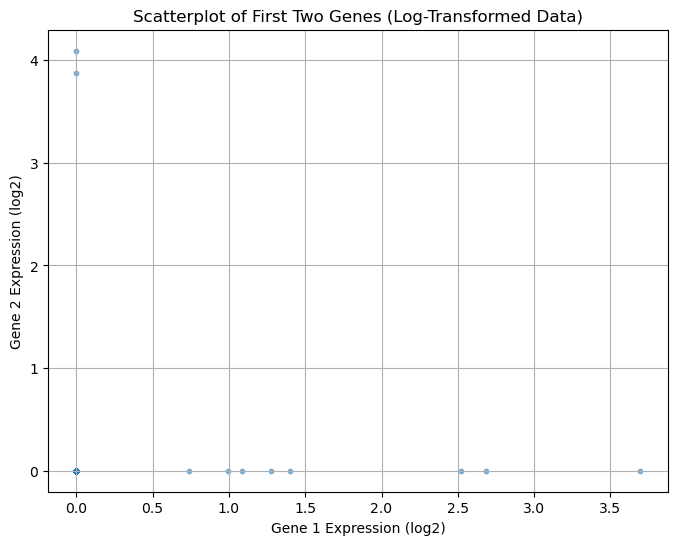

In [20]:
# Log data Viz


# Extract first two columns (genes)
x_axis = X_log[:, 0]  # First gene
y_axis = X_log[:, 1]  # Second gene

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_axis, y_axis, s=10, alpha=0.5)
plt.title("Scatterplot of First Two Genes (Log-Transformed Data)")
plt.xlabel("Gene 1 Expression (log2)")
plt.ylabel("Gene 2 Expression (log2)")
plt.grid(True)
plt.show()

Scaled data shape: (511, 45768)
PCA components shape: (511, 2)
Explained Variance Ratio (First Component):, 0.0600
Explained Variance Ratio (Second Component):, 0.0262


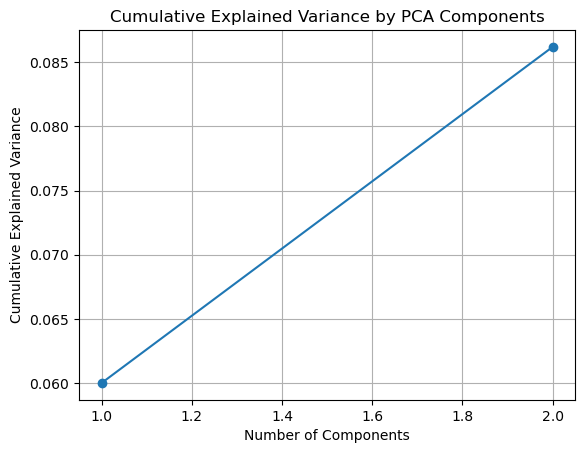

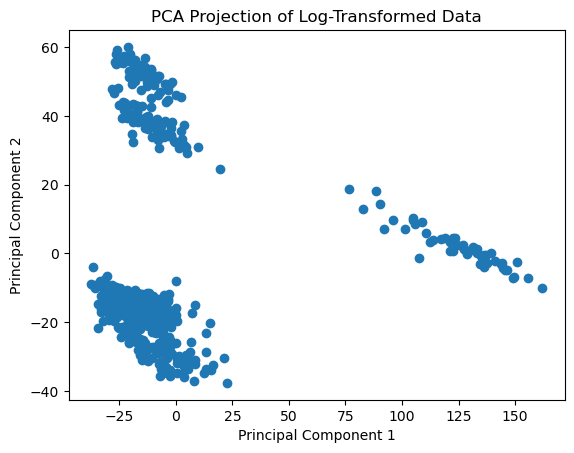

In [22]:
# Plotting PCA on top 2 PCs

# preprocess data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_log)
print("Scaled data shape:", X_scaled.shape)

# Perform PCA
pca = PCA(n_components=2)  # For visualization
pca_components = pca.fit_transform(X_scaled)
print("PCA components shape:", pca_components.shape)

# Explained Variance

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (First Component):, {explained_variance[0]:.4f}")
print(f"Explained Variance Ratio (Second Component):, {explained_variance[1]:.4f}")

# Cumulative Explained Variance Plot

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Log-Transformed Data')
plt.show()

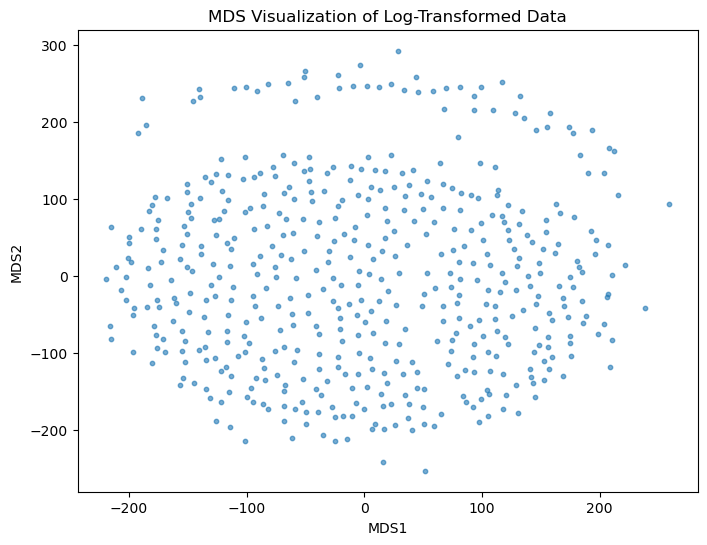

In [24]:
# Using Multi-Dimensional Scaling
# MDS is computationally demanding and may take some time to run on the large X_scaled data of shape (511, 45768)

# Run MDS multiple times to find the best embedding
best_stress = float('inf')
best_embedding = None
n_inits = 10 # Run 10 initializations

for seed in range(n_inits):
    mds = MDS(n_components=2, max_iter=1000, metric=True, random_state=seed)
    embedding = mds.fit_transform(X_scaled)
    if mds.stress_ < best_stress:
        best_stress = mds.stress_
        best_embedding = embedding

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(best_embedding[:, 0], best_embedding[:, 1], s=10, alpha=0.6)
plt.title("MDS Visualization of Log-Transformed Data")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.show()

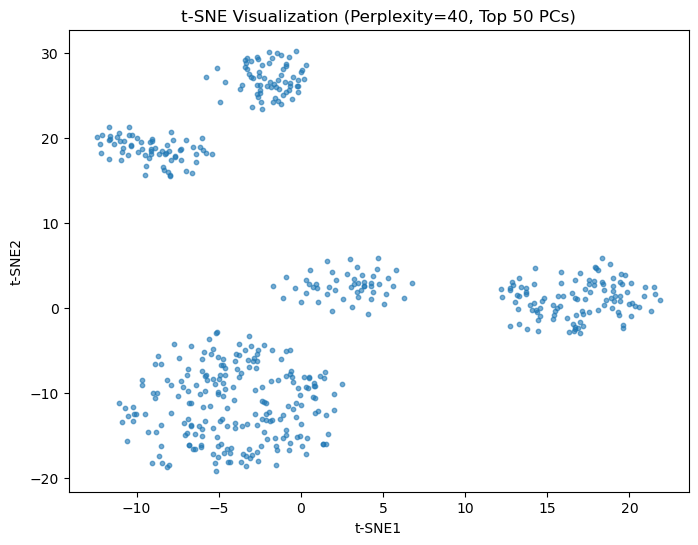

In [25]:
# Projecting 50 PCA to t-SNE

# Reduce computational run-time by using PCs with reasonably lower accuracy by saves cost and can handle more data point
# Project to top 50 PCs
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# Run t-SNE multiple times to find the best embedding
best_kl = float('inf')
best_tsne = None
n_inits = 10  # Number of initializations

for seed in range(n_inits):
    tsne = TSNE(n_components=2, perplexity=PERPLEXITY, random_state=seed)
    X_tsne = tsne.fit_transform(X_pca)
    if tsne.kl_divergence_ < best_kl:
        best_kl = tsne.kl_divergence_
        best_tsne = X_tsne

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(best_tsne[:, 0], best_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Visualization (Perplexity=40, Top 50 PCs)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

# Use the clusters determined by t-SNE and apply k-means to the 50 PCs (reduced-dim) to see how many clusters following identifies:
 - PCA,
 - MDS and
 - t-SNE

 - The main goal is to determine the maximum number of K-means clusters (colors) present within a single visual cluster in each of these plots.

In [38]:
# Stop leaking data warning

os.environ["OMP_NUM_THREADS"] = "2"


In [59]:
# Run K-means on projected and log-scaled 50pcs by observing clusters from the t-SNE above

# Define number of clusters based on the T-SNE plot (adjust as necessary)
n_clusters = 5  # Adjust based on visual interpretation

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Save cluster assignments
cluster_labels = clusters


C:\Users\MR-BEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Step 2: Modify Visualization Plots
Now, update the previous PCA, MDS, and T-SNE plots by coloring the data points based on their assigned cluster labels.

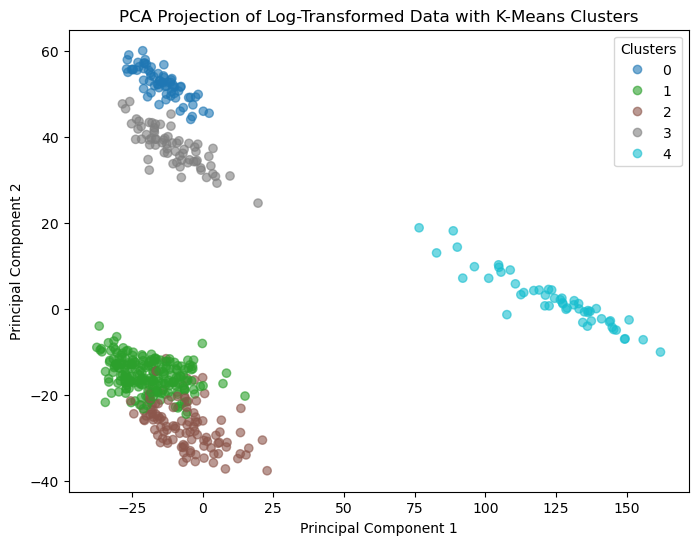

In [63]:
# PCA plot with clusters

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='tab10', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Log-Transformed Data with K-Means Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


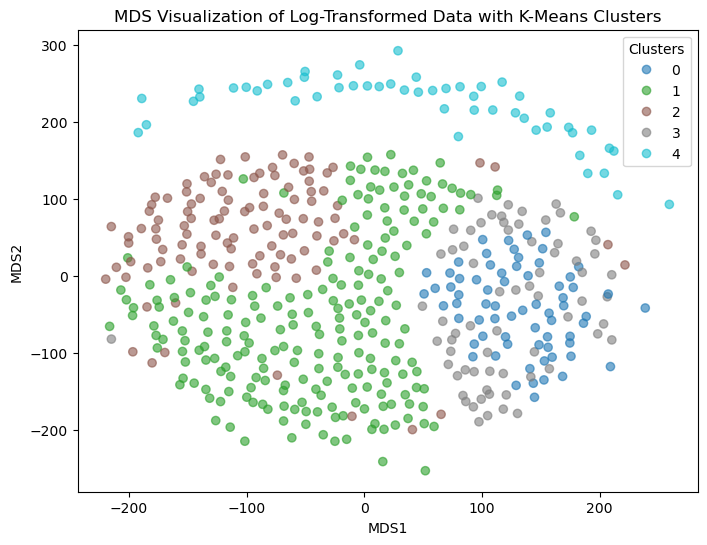

In [65]:
# MDS plot with clusters

plt.figure(figsize=(8, 6))
scatter = plt.scatter(best_embedding[:, 0], best_embedding[:, 1], c=cluster_labels, cmap='tab10', alpha=0.6)
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS Visualization of Log-Transformed Data with K-Means Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


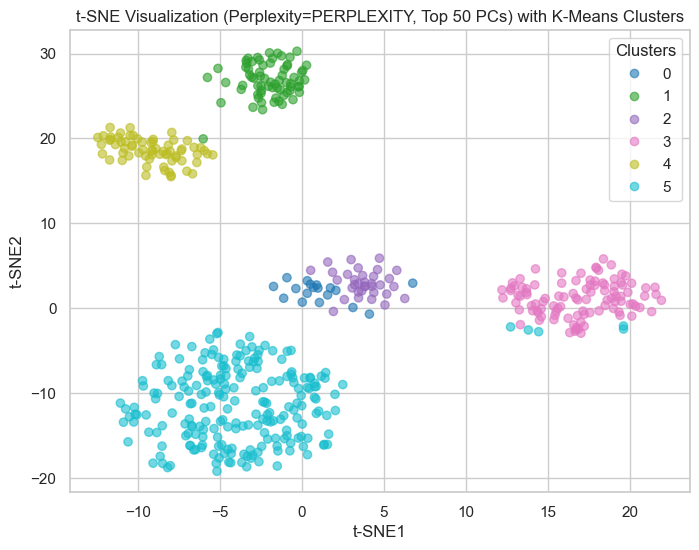

In [111]:
# t-SNE plot with clusters

plt.figure(figsize=(8, 6))
scatter = plt.scatter(best_tsne[:, 0], best_tsne[:, 1], c=cluster_labels, cmap='tab10', alpha=0.6)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Visualization (Perplexity=PERPLEXITY, Top 50 PCs) with K-Means Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


#  Determine How K is determined as a function of WGSS/distance/dissimariliarity

- Step 1: Compute WGSS for Different Values of K
The Within-Group Sum of Squares (WGSS) (or inertia) measures how tightly clustered the data points are within their assigned clusters. We will compute WGSS for different values of 
𝐾
K and plot the Elbow Curve to determine the optimal number of clusters.



C:\Users\MR-BEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MR-BEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MR-BEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MR-BEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

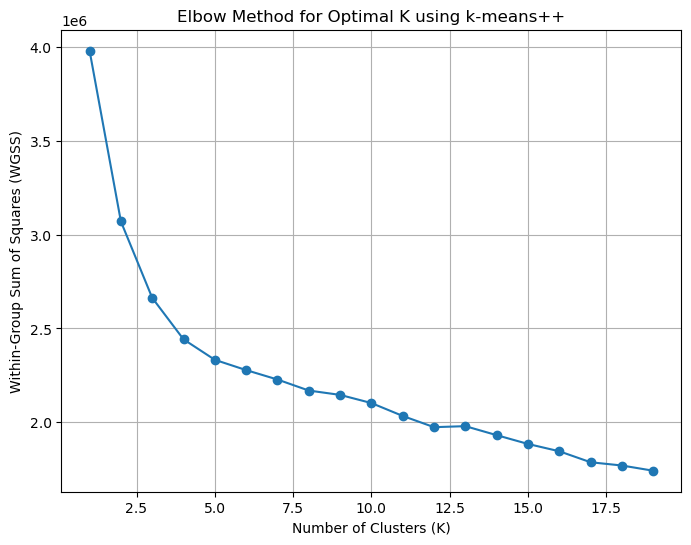

In [86]:
# Define the range of K values to test
K_values = range(1, 20)  # Testing K from 1 to 14
wgss = []  # Store Within-Group Sum of Squares (WGSS)

# Run K-Means for each value of K using k-means++ initialization
for k in K_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_pca)  # Use the projected data (top 50 PCs)
    wgss.append(kmeans.inertia_)  # Inertia (WGSS)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_values, wgss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Group Sum of Squares (WGSS)")
plt.title("Elbow Method for Optimal K using k-means++")
plt.grid(True)
plt.show()


In [114]:
# Rounding up to significant figure
def round_sig_figs(value, sig_figs=2):
    """Rounds a number to the specified significant figures."""
    if value == 0:
        return 0
    return round(value, -int(np.floor(np.log10(abs(value)))) + (sig_figs - 1))

# Compute WGSS using the optimal K
optimal_k = 5  # Replace with the correct K from the elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_pca)

wgss_value = kmeans.inertia_  # Raw WGSS value
wgss_rounded = round_sig_figs(wgss_value, 2)  # Properly rounded WGSS

print(f"Raw WGSS for K={optimal_k}: {wgss_value}")
print(f"Rounded WGSS (2 significant figures): {wgss_rounded}")


C:\Users\MR-BEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Raw WGSS for K=5: 2332573.444367424
Rounded WGSS (2 significant figures): 2300000.0


# Perform Hierarchical Clustering using the Ward Criterion
The Ward method minimizes variance within clusters.

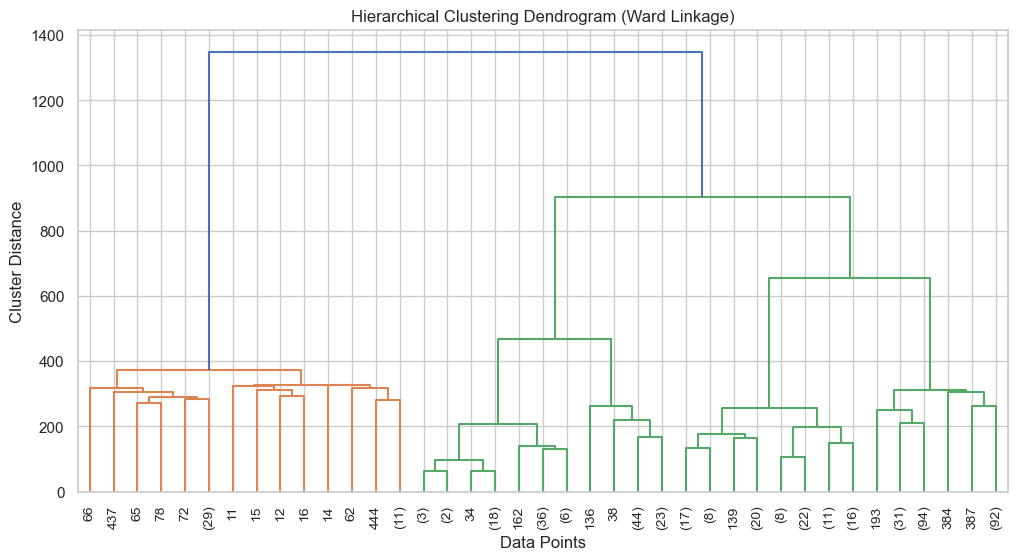

In [101]:
# Perform hierarchical clustering on the top 50 PCs
linkage_matrix = linkage(X_pca, method='ward')  

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
plt.show()


#### Experiment with Different Linkage Methods
The choice of linkage method affects how clusters are merged:

- ward → Minimizes variance within clusters (default, best for compact clusters).
- complete → Maximizes the distance between cluster points.
- average → Uses the mean distance between clusters.
- single → Uses the minimum distance (may cause chaining).

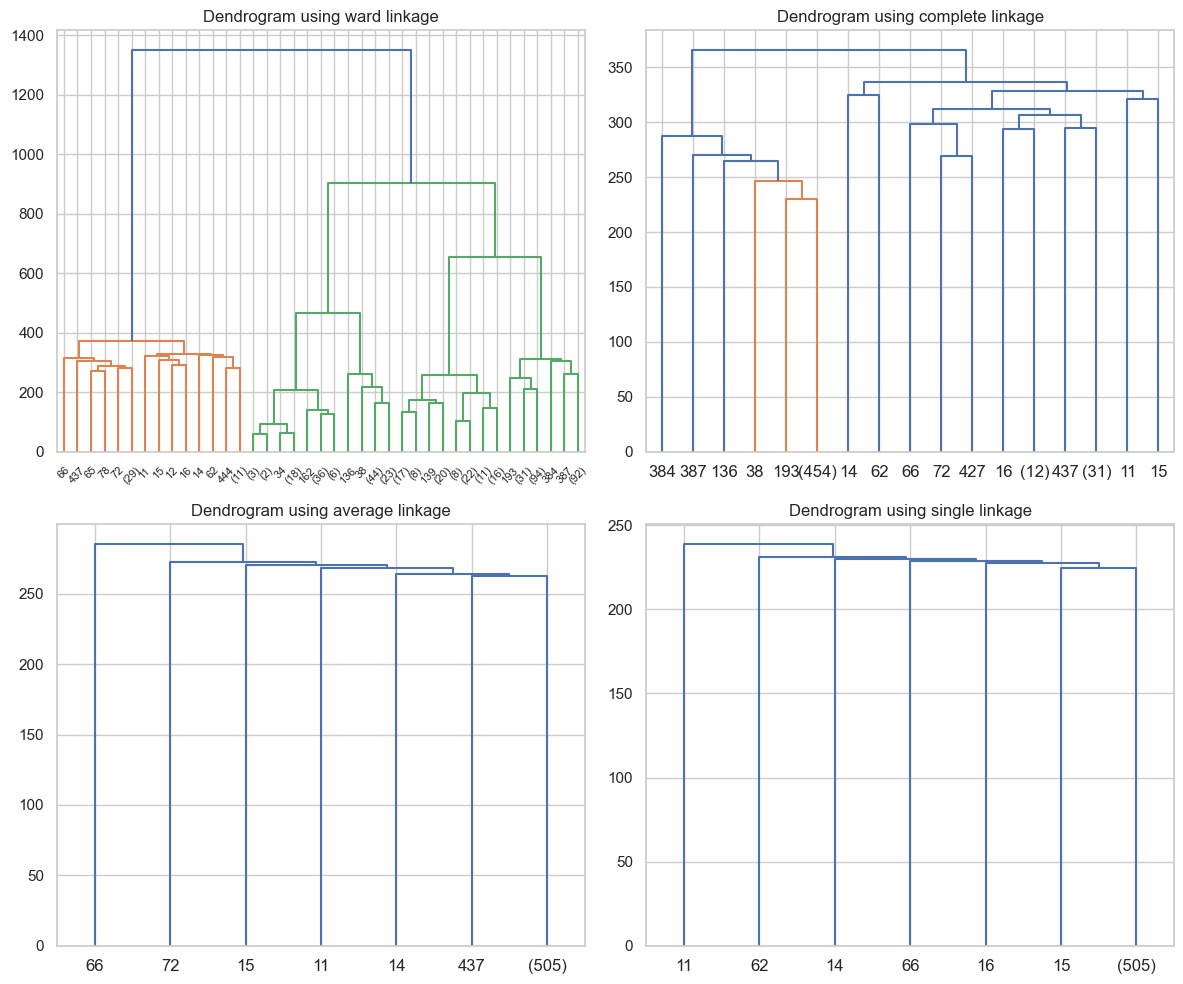

In [109]:
# Use different distance measure between PCs/reduced-dim data

linkage_methods = ["ward", "complete", "average", "single"]

plt.figure(figsize=(12, 10))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    linkage_matrix = linkage(X_pca, method=method)
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title(f"Dendrogram using {method} linkage")

plt.tight_layout()
plt.show()


In [116]:
# cluster assignments, use Agglomerative Clustering:

from sklearn.cluster import AgglomerativeClustering

optimal_k = 5  # Replace with the correct K from the elbow method
optimal_clusters = optimal_k # Based on dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage="ward")
cluster_labels = agg_clustering.fit_predict(X_pca)

print("Cluster Assignments:", np.unique(cluster_labels))


Cluster Assignments: [0 1 2 3 4]


# Compute Cluster Means in Original Space on Transformed Data
Since we found k clusters using K-Means, we now compute the mean value of data points in each cluster using 
the full original feature space after applying log-transformation and standandard scaler (X_scaled).

In [118]:
# Compute cluster means in original space

optimal_k = 5  # Replace with the correct K from the elbow method
k = optimal_k  # Use the k determined from the elbow method
cluster_means = np.array([X_scaled[kmeans.labels_ == i].mean(axis=0) for i in range(k)])

print(f"Cluster means shape: {cluster_means.shape}")  # Should be (k, d)


Cluster means shape: (5, 45768)


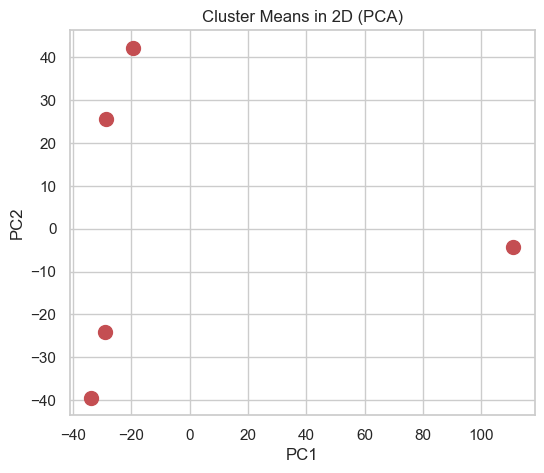

In [122]:
# Visualize Cluster Means Using PCA

# Reduce cluster means to 2D using PCA
pca = PCA(n_components=2)
cluster_means_pca = pca.fit_transform(cluster_means)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(cluster_means_pca[:, 0], cluster_means_pca[:, 1], c='r', marker='o', s=100)
plt.title("Cluster Means in 2D (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


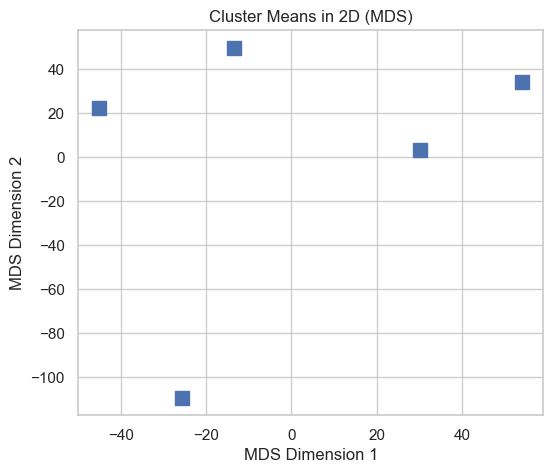

In [124]:
# Visualize Cluster Means Using MDS
# Multidimensional Scaling (MDS) aims to preserve pairwise distances better than PCA.

# Reduce cluster means to 2D using MDS
mds = MDS(n_components=2, random_state=42)
cluster_means_mds = mds.fit_transform(cluster_means)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(cluster_means_mds[:, 0], cluster_means_mds[:, 1], c='b', marker='s', s=100)
plt.title("Cluster Means in 2D (MDS)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid(True)
plt.show()


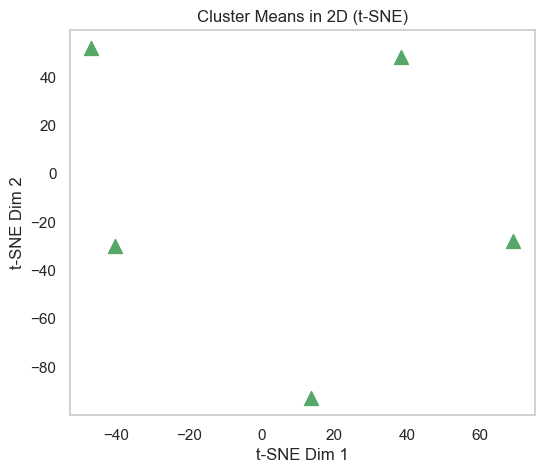

In [132]:
# Compare with t-SNE
# t-SNE is a non-linear technique designed to preserve local structure, often forming well-separated groups.

optimal_k = 5  # Replace with the correct K from the elbow method
k = optimal_k  # Use the k determined from the elbow method

# Ensure perplexity is less than k
perplexity_value = max(4, min(k - 2, PERPLEXITY))  # Keep it within [5, k-1] range

# Reduce cluster means to 2D using t-SNE
# Apply t-SNE with adjusted perplexity
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
cluster_means_tsne = tsne.fit_transform(cluster_means)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(cluster_means_tsne[:, 0], cluster_means_tsne[:, 1], c='g', marker='^', s=100)
plt.title("Cluster Means in 2D (t-SNE)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid()
plt.show()


# Compute Cluster Means in Original Space on NOT-Transformed Data
Since we found k clusters using K-Means, we now compute the mean value of data points in each cluster using 
the full original feature space without log-transformation/normalisation_scaling (X).

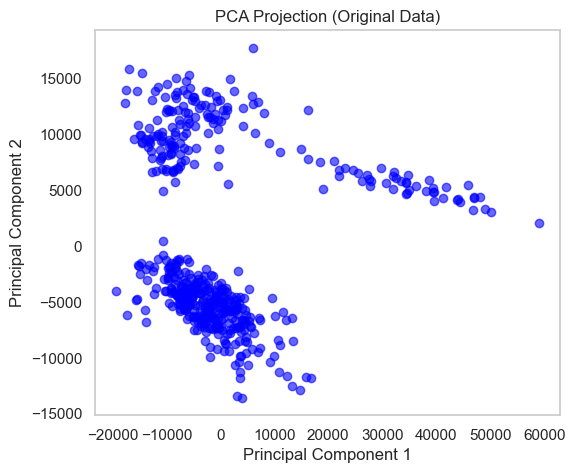

In [176]:
# PCA on not-transformed data

# Apply PCA on original (non-log-transformed) data
pca = PCA(n_components=2)  # Reduce to 2D
X_pca_orig = pca.fit_transform(X)  # Replace X_original with your untransformed dataset

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(X_pca_orig[:, 0], X_pca_orig[:, 1], c='blue', alpha=0.6)
plt.title("PCA Projection (Original Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


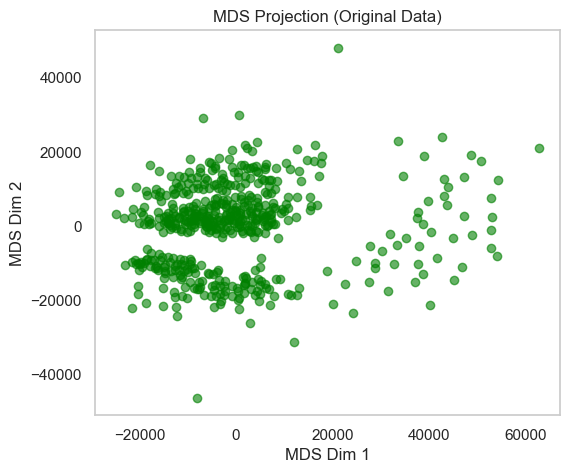

In [178]:
# MDS on original data

# Apply MDS on original data
mds = MDS(n_components=2, random_state=42)
X_mds_orig = mds.fit_transform(X)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(X_mds_orig[:, 0], X_mds_orig[:, 1], c='green', alpha=0.6)
plt.title("MDS Projection (Original Data)")
plt.xlabel("MDS Dim 1")
plt.ylabel("MDS Dim 2")
plt.grid()
plt.show()




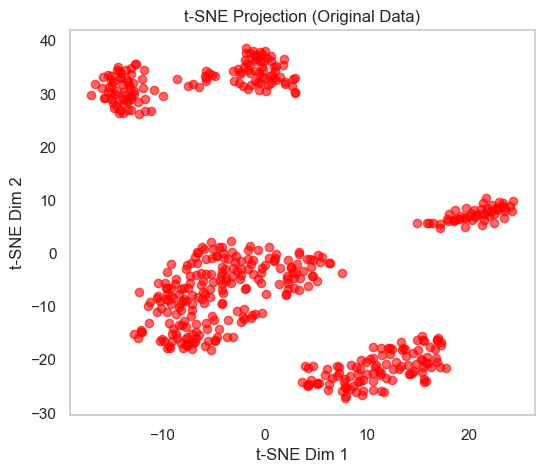

In [179]:
# t-SNE on original data

# Apply t-SNE on original data (ensure perplexity < n_samples)
perplexity_value = max(5, min(30, X.shape[0] - 1))
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
X_tsne_orig = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne_orig[:, 0], X_tsne_orig[:, 1], c='red', alpha=0.6)
plt.title("t-SNE Projection (Original Data)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid()
plt.show()
